In [3]:
df = pd.read_csv('merged_follower_affiliation.csv')
df.head()

,Unnamed: 0,converted_utc_time,truncated,user_follower_count,user_friend_count,user_id,user_location,user_name,tweet_text_full,UID,players followed,team followed,NE_patriots key player present,LA_Rams key player present,team_affiliation_superfollowers
0,1000031369823735808,2019-02-03 21:25:05,False,431,1001,1000031369823735808,ATL,Lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,1000031369823735808,toddgurley sonymichel,both,False,True,la_rams
1,1000062082560282624,2019-02-03 19:04:48,False,67,680,1000062082560282624,"Boston, MA",Options Owl,RT @NFL_Memes: Still more exciting than watchi...,1000062082560282624,patriots tombrady,ne_patriots,True,False,ne_patriots
2,1000069917423489024,2019-02-03 19:15:27,False,112,225,1000069917423489024,"Virgin Islands, USA",Ra’s al Ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,1000069917423489024,aarondonald,la_rams,False,False,la_rams
3,1000069917423489024,2019-02-03 20:49:02,False,112,225,1000069917423489024,"Virgin Islands, USA",Ra’s al Ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",1000069917423489024,aarondonald,la_rams,False,False,la_rams
4,1000069917423489024,2019-02-03 20:46:54,False,112,225,1000069917423489024,"Virgin Islands, USA",Ra’s al Ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,1000069917423489024,aarondonald,la_rams,False,False,la_rams


In [8]:
df = pd.read_csv('merged_follower_affiliation.csv', usecols=['user_name', 'tweet_text_full', 'team_affiliation_superfollowers'])
df.head()

,user_name,tweet_text_full,team_affiliation_superfollowers
0,Lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,la_rams
1,Options Owl,RT @NFL_Memes: Still more exciting than watchi...,ne_patriots
2,Ra’s al Ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,la_rams
3,Ra’s al Ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",la_rams
4,Ra’s al Ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,la_rams


In [2]:
df1 = pd.read_csv('merged_follower_affiliation.csv', usecols=['tweet_text_full'])
df1.head()

,tweet_text_full
0,RT @OfcrMatt: Who wants some free swag?\r\n\r\...
1,RT @NFL_Memes: Still more exciting than watchi...
2,RT @P2: Super Bowl commercial debut. Such a bl...
3,"RT @MoveTheSticks: If NE wins, Edelman is the ..."
4,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...


In [2]:
import re
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MeanShift

In [4]:
def extract_rt(text):
    try:
        m = re.match(r'^RT:? +@(.*?):', text)
        if m:
            return m.group(1).lower()
        return np.nan
    except:
        return np.nan


class Enumerator:
    def __init__(self):
        self.i = 0
        self.dict = dict()

    def __getitem__(self, item):
        if item not in self.dict:
            save = self.i
            self.dict[item] = self.i
            self.i += 1
            return save
        return self.dict[item]

    def __contains__(self, value):
        return value in self.dict

In [5]:
df = pd.read_csv('merged_follower_affiliation.csv', usecols=['user_name', 'tweet_text_full'])

In [6]:
df.head()

,user_name,tweet_text_full
0,Lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...
1,Options Owl,RT @NFL_Memes: Still more exciting than watchi...
2,Ra’s al Ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...
3,Ra’s al Ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ..."
4,Ra’s al Ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...


In [5]:
df.to_csv('new_merged_follower_affiliation.csv', header=None, index=False)

In [10]:
df_text = pd.read_csv('new_merged_follower_affiliation.csv', header=None, error_bad_lines=False)
df_text.columns = ['User', 'Text']
df_text = df_text.apply(lambda s: s.str.strip())
df_text.loc[:, 'User'] = df_text.User.str.lower()

In [11]:
# Extract retweeted accounts and work only with those rows
df_text['Retweet'] = df_text.Text.apply(extract_rt)
df_text.dropna(subset=['Retweet'], inplace=True)

In [12]:
df_text.head()

,User,Text,Retweet
0,lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,ofcrmatt
1,options owl,RT @NFL_Memes: Still more exciting than watchi...,nfl_memes
2,ra’s al ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,p2
3,ra’s al ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",movethesticks
4,ra’s al ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,espn


In [9]:
print(f"Number of Retweets: {len(df_text)}")
print(f"Number of unique users after filtering only Retweets: {df_text.User.nunique()}")

Number of Retweets: 90250
Number of unique users after filtering only Retweets: 52065


In [27]:
# Sample users
min_nunique_retweet = 5
sample_size = 5000

In [28]:
users_of_interest = df_text.groupby('User')['Retweet'].nunique() \
    .where(lambda x: x >= min_nunique_retweet).dropna() \
    .sort_values(ascending=False).head(n=sample_size)

In [29]:
# Filter df_text to have only the Tweets of the sampled users
df_text = df_text[df_text.User.isin(users_of_interest.index)]

In [13]:
# Calculate similarity
user_feature_counts = df_text.groupby(['User', 'Retweet']).size()
user2idx = Enumerator()
feature2idx = Enumerator()

In [14]:
row_ind = []
col_ind = []
data = []
for (user, feature), count in user_feature_counts.items():
    row_i = user2idx[user]
    col_i = feature2idx[feature]
    row_ind.append(row_i)
    col_ind.append(col_i)
    data.append(count)

In [15]:
user_feature_matrix = sparse.csr_matrix((data, (row_ind, col_ind)))
user2user_sim = cosine_similarity(user_feature_matrix).clip(max=1.0) # clip, because sometimes get values like 1.0000000014

In [16]:
# Dimentionality reduction
user_points = UMAP(metric='precomputed').fit_transform(1 - user2user_sim) # works with distances, NOT similarity

# Scale user vectors between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
user_points_scaled = scaler.fit_transform(user_points)

idx2user = {v:k for k, v in user2idx.dict.items()}
df_user = pd.DataFrame(user_points_scaled, index=map(idx2user.get, range(len(user_points_scaled))))

/home/zou00080/anaconda3/envs/dl/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


In [17]:
# Clustering
clusters = MeanShift(cluster_all=False, bin_seeding=True).fit(df_user.values)
df_user['cluster_id'] = clusters.labels_

In [18]:
# Regard users in very small clusters as unclustered
for c in df_user['cluster_id'].unique():
    if c == -1:
        continue
    if len(df_user[df_user['cluster_id'] == c]) < len(df_user[df_user['cluster_id'] != -1]) * 0.01:
        df_user.loc[df_user['cluster_id'] == c, 'cluster_id'] = -1

In [19]:
df_user.head()

,0,1,cluster_id
"""rowdy""",0.709300,-0.507072,-1
#allincle #allforone,-0.750664,-0.368673,-1
#balorclub,0.132771,0.470690,-1
#beatla,0.226581,-0.595684,0
#boycottthenfl,-0.090955,0.242821,0


In [20]:
# Generate output
# cluser ID of -1 means the item was not clustered
df_user[df_user.cluster_id != -1].to_csv('active_users.csv')

In [7]:
active_users = pd.read_csv('active_users.csv')
active_users.head() #coordinates on 2D plane
# only able to classify the most vocal users

,Unnamed: 0,0,1,cluster_id
0,#beatla,0.226581,-0.595684,0
1,#boycottthenfl,-0.090955,0.242821,0
2,#dukenation 19-2,0.016345,0.329817,0
3,#everythingwegot,0.356937,-0.375891,0
4,#flyeaglesfly,-0.110235,0.447484,0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [23]:
X0 = pd.read_csv('active_users.csv', usecols=[1])

In [24]:
X1 = pd.read_csv('active_users.csv', usecols=[2])

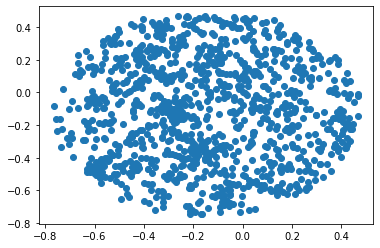

In [25]:
plt.scatter(X0, X1, cmap='rainbow')

In [26]:
X = pd.read_csv('active_users.csv')
clustered_users = X.shape[0]
clustered_users

1060

In [27]:
df_user.to_csv('whole_users.csv')

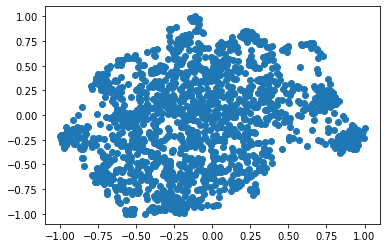

In [30]:
X_0 = pd.read_csv('whole_users.csv', usecols=[1])
X_1 = pd.read_csv('whole_users.csv', usecols=[2])
plt.scatter(X_0, X_1)

In [52]:
labeled = pd.read_csv('merged_follower_affiliation.csv', usecols=['user_name', 'tweet_text_full', 'team_affiliation_superfollowers'])
label_dict = labeled['team_affiliation_superfollowers'].unique().tolist()
label_dict

['la_rams', 'ne_patriots', 'both', 'sports_fan']

In [53]:
labeled['label'] = labeled['team_affiliation_superfollowers'].apply(lambda x : label_dict.index(x))
labeled.head()

,user_name,tweet_text_full,team_affiliation_superfollowers,label
0,Lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,la_rams,0
1,Options Owl,RT @NFL_Memes: Still more exciting than watchi...,ne_patriots,1
2,Ra’s al Ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,la_rams,0
3,Ra’s al Ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",la_rams,0
4,Ra’s al Ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,la_rams,0


In [29]:
labeled.loc[:, 'label'].value_counts()

1    98238
0    23943
2    19183
3      761
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

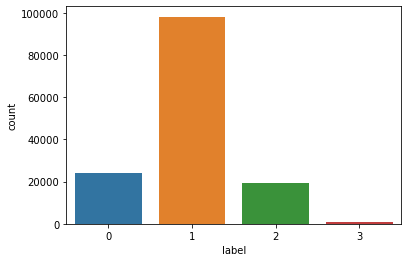

In [64]:
import seaborn as sns

sns.countplot(x="label", data=labeled)

In [52]:
labeled['user_name'].nunique()
# 1. this is the total users we got (unique), 78602->overwhelmed by large class and ignore small ones
# possible improvement 1: needs unsampling

78602

In [ ]:
# Number of unique users after filtering only Retweets
# 2. this is the total users who retweeted at least once,2181 vocal users 52065

In [32]:
df_user.head() # cluster_id -1/0

,0,1,cluster_id
"""rowdy""",0.709300,-0.507072,-1
#allincle #allforone,-0.750664,-0.368673,-1
#balorclub,0.132771,0.470690,-1
#beatla,0.226581,-0.595684,0
#boycottthenfl,-0.090955,0.242821,0


In [36]:
df_user.shape[0] # active_user 2181
# 3. this is the total active users who retweet at least 5 times, 2181

2181

In [31]:
active_users.head() # cluster_id 0, all clustered
# use those auto clustered users to train a supervised model
# 4. this is the total clustered users, 1060

,Unnamed: 0,0,1,cluster_id
0,#beatla,0.226581,-0.595684,0
1,#boycottthenfl,-0.090955,0.242821,0
2,#dukenation 19-2,0.016345,0.329817,0
3,#everythingwegot,0.356937,-0.375891,0
4,#flyeaglesfly,-0.110235,0.447484,0


In [ ]:
# our goal for supervised model: 1060 train->label all the 2181 active users

In [38]:
df_text.head() # retweet num

,User,Text,Retweet
0,lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,ofcrmatt
13,pete,RT @AdamSchefter: As the MVP of this year’s Su...,adamschefter
30,ashley,RT @MarkDanielsPJ: The Patriots lost Super Bow...,markdanielspj
35,ἴ8superbowl aaronkrucoffἴ8,RT @swin24: my favorite super bowl commercials...,swin24
36,ἴ8superbowl aaronkrucoffἴ8,RT @TheOnion: Super Bowl Halftime Show Marred ...,theonion


In [53]:
df_text['User'].nunique()

2181

In [39]:
users_of_interest # retweet num->feature

User
chris                121.0
nick                  99.0
.                     94.0
alex                  93.0
josh                  89.0
                     ...  
joanne meyer           5.0
joanna                 5.0
joann @ esaudio:)      5.0
jo$h                   5.0
kathleen bruce         5.0
Name: Retweet, Length: 2181, dtype: float64

In [40]:
users_of_interest.index

Index(['chris', 'nick', '.', 'alex', 'josh', 'ryan', 'matt', 'sam', 'brandon',
       'michael',
       ...
       'yeff', 'yianni manousaridis', 'joe sheehan', 'joe barnes', 'jody d',
       'joanne meyer', 'joanna', 'joann @ esaudio:)', 'jo$h',
       'kathleen bruce'],
      dtype='object', name='User', length=2181)

## STEPS

In [ ]:
# step 1: exclude unlabeled user accounts in df_text to create training dataset

In [33]:
# labeled user accounts list
labeled_list = active_users['Unnamed: 0'].to_list()

In [34]:
supervised = df_text[['User', 'Retweet']]

In [35]:
supervised = supervised[supervised.User.isin(labeled_list)]

In [36]:
supervised.head()

,User,Retweet
0,lauren,ofcrmatt
67,caleb,anatescott
68,caleb,theonion
101,andy,sbnation
115,james,scootermagruder


In [37]:
supervised['Label'] = 'ne_patriots'

In [38]:
supervised.head()

,User,Retweet,Label
0,lauren,ofcrmatt,ne_patriots
67,caleb,anatescott,ne_patriots
68,caleb,theonion,ne_patriots
101,andy,sbnation,ne_patriots
115,james,scootermagruder,ne_patriots


In [ ]:
# step 2: format data using

In [39]:
supervised = supervised[['Label', 'Retweet']]

In [40]:
supervised['Label'] = supervised['Label'].apply(lambda x: '__label__' + x)

In [41]:
supervised.head()

,Label,Retweet
0,__label__ne_patriots,ofcrmatt
67,__label__ne_patriots,anatescott
68,__label__ne_patriots,theonion
101,__label__ne_patriots,sbnation
115,__label__ne_patriots,scootermagruder


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, test = train_test_split(supervised, test_size=0.2)

In [31]:
train.to_csv('train.csv', sep=' ', index=False, header=False)
test.to_csv('test.csv', sep=' ', index=False, header=False)

In [ ]:
# step 3: train FastText by default parameters

In [44]:
import fasttext as ft

In [45]:
classifier = ft.train_supervised(input='train.csv', epoch=10, lr=0.01, wordNgrams=2, minCount=1, 
                                 loss="softmax")

In [ ]:
# step 4: evaluate the model, precision and recall

In [33]:
classifier.test('test.csv') # only one label

(2233, 1.0, 1.0)

In [34]:
classifier.test('train.csv')

(8929, 1.0, 1.0)

In [37]:
classifier.predict(['angel_og'], k=1)

([['__label__ne_patriots']], [array([1.00001], dtype=float32)])

In [ ]:
# step 5: extend labels

In [31]:
classified = df_text # 2181 vocal users

In [47]:
classified['Label'] = classified['Retweet'].apply(lambda x: classifier.predict(x, k=1)[0])

/home/zou00080/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
classified.head()

,User,Text,Retweet,Label
0,lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,ofcrmatt,"(__label__ne_patriots,)"
13,pete,RT @AdamSchefter: As the MVP of this year’s Su...,adamschefter,"(__label__ne_patriots,)"
30,ashley,RT @MarkDanielsPJ: The Patriots lost Super Bow...,markdanielspj,"(__label__ne_patriots,)"
35,ἴ8superbowl aaronkrucoffἴ8,RT @swin24: my favorite super bowl commercials...,swin24,"(__label__ne_patriots,)"
36,ἴ8superbowl aaronkrucoffἴ8,RT @TheOnion: Super Bowl Halftime Show Marred ...,theonion,"(__label__ne_patriots,)"


In [49]:
classified['Label'].value_counts()

(__label__ne_patriots,)    22195
Name: Label, dtype: int64

In [ ]:
# step 6: calculate the accuracy using benchmark we have
# double check if that 2181 active users are classified correctly (all ne_patriots)

In [66]:
classified_list = classified.User.unique().tolist()

In [62]:
labeled.head() # label 1: ne_patriots

,user_name,tweet_text_full,team_affiliation_superfollowers,label
0,Lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,la_rams,0
1,Options Owl,RT @NFL_Memes: Still more exciting than watchi...,ne_patriots,1
2,Ra’s al Ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,la_rams,0
3,Ra’s al Ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",la_rams,0
4,Ra’s al Ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,la_rams,0


In [54]:
precision_check = labeled

In [55]:
precision_check.loc[:, 'user_name'] = precision_check.user_name.str.lower()

In [56]:
precision_check.head()

,user_name,tweet_text_full,team_affiliation_superfollowers,label
0,lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,la_rams,0
1,options owl,RT @NFL_Memes: Still more exciting than watchi...,ne_patriots,1
2,ra’s al ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,la_rams,0
3,ra’s al ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",la_rams,0
4,ra’s al ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,la_rams,0


In [92]:
precision_check['classified'] = precision_check['user_name'].apply(lambda x: 'ne_patriots' if x in classified_list else 'NULL')

In [94]:
precision_check.head()

,user_name,tweet_text_full,team_affiliation_superfollowers,label,classified
0,lauren,RT @OfcrMatt: Who wants some free swag?\r\n\r\...,la_rams,0,ne_patriots
1,options owl,RT @NFL_Memes: Still more exciting than watchi...,ne_patriots,1,NULL
2,ra’s al ghul ὓ1,RT @P2: Super Bowl commercial debut. Such a bl...,la_rams,0,NULL
3,ra’s al ghul ὓ1,"RT @MoveTheSticks: If NE wins, Edelman is the ...",la_rams,0,NULL
4,ra’s al ghul ὓ1,RT @espn: INTERCEPTION!\r\n\r\nThe Patriots ar...,la_rams,0,NULL


In [97]:
precision_check['precision']=np.where(precision_check['team_affiliation_superfollowers']==
                                     precision_check['classified'], 'true', np.nan)

In [99]:
precision_check.tail()

,user_name,tweet_text_full,team_affiliation_superfollowers,label,classified,precision
142120,¡no me toques los cojones!,RT @StencilSupremo: 2 years ago I made the epi...,ne_patriots,1,ne_patriots,true
142121,¡no me toques los cojones!,We got ourselves a 3 points game that could’ve...,ne_patriots,1,ne_patriots,true
142122,jose,RT @Angel_OG: Worst super bowl I’ve seen,ne_patriots,1,ne_patriots,true
142123,devaughn.hill,RT @TheJWittz: Okay #SuperBowl Halftime ... Yo...,la_rams,0,NULL,nan
142124,aust in space,RT @DanRather: This Super Bowl will be memorab...,ne_patriots,1,NULL,nan


In [101]:
precision_check['precision'].value_counts()

nan     123670
true     18455
Name: precision, dtype: int64

In [ ]:
# precision: 18455/22195 = 83%